In [8]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [317]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = .2,random_state = 42)

In [318]:
X_train.shape,X_test.shape

((404, 13), (102, 13))

In [340]:
clf = SGDRegressor()
clf.fit(X_train, y_train)
y_predicted1 = clf.predict(X_test)
print(mean_squared_error(y_test, y_predicted1))

27.16785086893904


In [221]:
train=[]
i = 0
for row in X_train:
    t = []
    for val in row:
        t.append(val)
    t.append(y_train[i])
    train.append(t)
    i = i+1 
test = []
i = 0
for row in X_test:
    t = []
    for val in row:
        t.append(val)
    t.append(y_test[i])
    test.append(t)
    i = i + 1

In [1]:
<iframe src="https://www.codiva.io/em/p/49a59bbc-e133-4a8d-a0dc-55d20ef729d2" style="height: 600px; min-height: 420px; max-height: 90vh; width: 100%; overflow: hidden;"></iframe>

SyntaxError: invalid syntax (<ipython-input-1-97858ae34767>, line 1)

### SGD implementation

In [230]:
def update_coef(learning_rate,error,w,data):
            ip = 1
            for i in range(len(data)-1):
                if ip==1:                            ## for first iteration to update the interept term
                    w[0] = w[0]-learning_rate*error
                    ip=ip+1
                vx = learning_rate * error * data[i]
                w[i + 1] = w[i + 1] - vx  # updating rest of the coefficients
            return w

In [231]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i] # multiplying coef with the input for making prediction
    return yhat

In [3]:
%%latex
$Y_{Prediction} = x_{1}*w_{1}+ x_{2}*w_{2}+......$

<IPython.core.display.Latex object>

In [405]:
def coef_sgd_m(train,epoch,learning_rate,r):
    w= []                        
    #initializing the w with some random uniform value in the range(0,r)
    for i in range(0,len(train[0])):
        val = np.random.uniform(0,r)
        w.append(val)
    # loop for number of epochs in the model    
    for iteration in range(epoch):    
        sum_of_error = 0
        # loop for each data point in the dataset
        for data in train:   
            ip = 1
            for i in range(len(data)-1):
                # for intercept term
                if ip==1:                  
                    y_predicted = w[0]
                    ip = ip+1
                #for rest of the coefficient
                y_predicted = y_predicted + w[i + 1] * data[i]
            #last value in data is actual y
            error = y_predicted - data[-1] 
            #calculating sum of squared error
            sum_of_error =sum_of_error + error**2
            # updating the coefficient on the basis of one data point
            w = update_coef(learning_rate,error,w,data)          
    return  w

In [412]:
## to find out the error test as well as training error
def coef_sgd(train,epoch,learning_rate,r,test):
    w, err,err_t= [],[],[]                        #initializing the weights in range (0,20)
    for i in range(0,len(train[0])):
        val = np.random.uniform(0,r)    ## initialization parameter
        w.append(val)
        

    for iteration in range(epoch):   # loop for number of epochs in the model 
        sum_of_error,err_test = 0,0
        for dx in test:               ## storing the test error at each itration
            y_ = predict(dx,w)
            err_test= err_test + (y_- dx[-1])**2
        err_t.append(err_test)
        for data in train:   # loop for each point in the dataset
            ip = 1
            for i in range(len(data)-1):
                if ip==1:                   # for intercept term
                    y_predicted = w[0]
                    ip = ip+1
                y_predicted = y_predicted + w[i + 1] * data[i]
            error = y_predicted - data[-1]
            sum_of_error =sum_of_error + error**2
            w = update_coef(learning_rate,error,w,data)  # updating the coefficient for one row in the datas
        err.append(sum_of_error)
    return [w,err,err_t]

In [409]:
train = np.array(train)
test = np.array(test)

## Cross validation for optimal parameter

In [410]:
opt_val = 999999999999999999999999
opt_lr = 0
opt_epoch = 0
opt_r = 0
for lr in [.0021,.0024,.0025,.0026,.00270]:
    for epoch in [100,200,400,500,700,1000,1200]:
        for r in [2,3,4,5,6,7,8,9,10]:
            pre = []
            w = coef_sgd_m(train,epoch,lr,r)
            for i in test:
                pre.append(predict(i,w))
            mean_squared_error(y_test,pre)
            if opt_val > mean_squared_error(y_test,pre):
                opt_epoch = epoch
                opt_val = mean_squared_error(y_test,pre)
                opt_r = r
                opt_lr = lr
print("Opt Mean Squared error:",opt_val)
print("Opt_epoch :",opt_epoch)
print("Opt Learning rate: ",opt_lr)
print("Opt initiallize range :",opt_r)

Opt Mean Squared error: 23.92638063595962
Opt_epoch : 1000
Opt Learning rate:  0.0025
Opt initiallize range : 7


In [ ]:
## After trying a lot i am not able to get mse less then 23.92

## training error and testing error for each epoch and final testing on optimal parameters

In [413]:
y_predicted = []
x = coef_sgd(train,1000,lr,7,test)
w,errr,err_test = x[0],x[1],x[2]
w1,errr1 = z[0],z[1]
for i in test:
    y_predicted.append(predict(i,w))
print("Mean squared error of the model on the test data:",mean_squared_error(y_test,y_predicted))
print("Root Mean squared error of the model on the test data:",math.sqrt(mean_squared_error(y_test,y_predicted)))

Mean squared error of the model on the test data: 23.929243898464403
Root Mean squared error of the model on the test data: 4.891752640768378


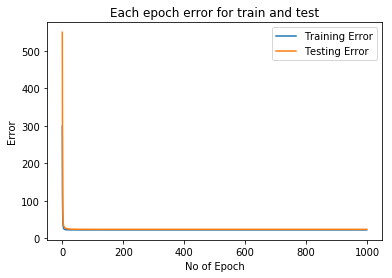

In [399]:
plt.plot(np.array(errr)/404)   # training data is contating 404 points so doing average of sum of error at each epoch
plt.plot(np.array(err_test)/102)
plt.title("Each epoch error for train and test")
plt.xlabel("No of Epoch")
plt.ylabel("Error")
plt.legend(["Training Error","Testing Error"])

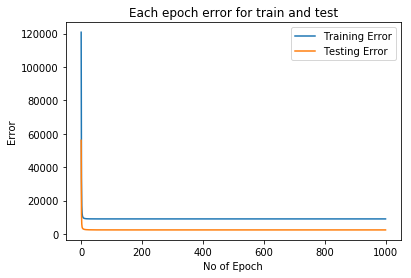

In [400]:
plt.plot(np.array(errr))   #without average
plt.plot(np.array(err_test))
plt.title("Each epoch error for train and test")
plt.xlabel("No of Epoch")
plt.ylabel("Error")
plt.legend(["Training Error","Testing Error"])

In [362]:
clf = SGDRegressor( penalty='l2', alpha=0.0025,max_iter=1000)
clf.fit(X_train, y_train)
y_predicted1 = clf.predict(X_test)
print("Mean Squared Error using sklearn implementation :",mean_squared_error(y_test, y_predicted1))
print("Root Mean squared error of the model on the test data:",math.sqrt(mean_squared_error(y_test,y_predicted1)))

Mean Squared Error using sklearn implementation : 24.32439290494464
Root Mean squared error of the model on the test data: 4.931976571816278


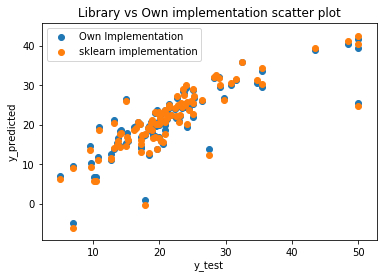

In [363]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predicted)
plt.scatter(y_test,y_predicted1)
plt.title("Library vs Own implementation scatter plot")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.legend(["Own Implementation","sklearn implementation"])
plt.show()

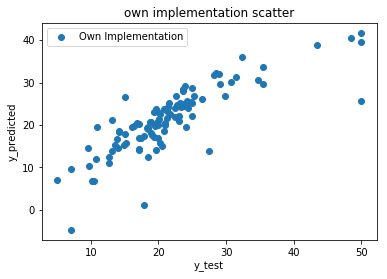

In [364]:
plt.scatter(y_test,y_predicted)
plt.title("own implementation scatter")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.legend(["Own Implementation"])
plt.show()

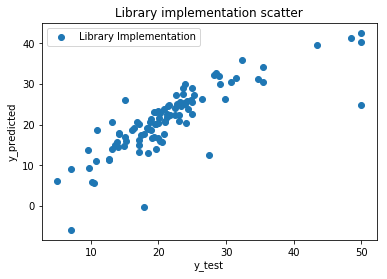

In [365]:
plt.scatter(y_test,y_predicted1)
plt.title("Library implementation scatter")
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.legend(["Library Implementation"])
plt.show()

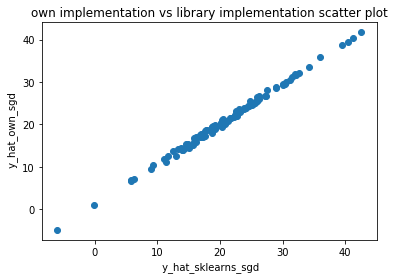

In [367]:
plt.scatter(y_predicted1,y_predicted)
plt.title("own implementation vs library implementation scatter plot")
plt.xlabel(" y_hat_sklearns_sgd")
plt.ylabel(" y_hat_own_sgd")
plt.show()

In [419]:
sk_coef = []
for v in clf.coef_:
    sk_coef.append(round(v,2))
own_coef = []
for v in w1 :
    own_coef.append(round(v,2))

In [420]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = (["Implementation", "MSE","RMSE"])
x.add_row(["Own", 23.938608733739656, 4.892709753678391])
x.add_row(["Sklearn",24.32439290494464, 4.931976571816278])
print(x)
x = PrettyTable()
x.field_names = (["Implementation","Weights"])
x.add_row(["Own", own_coef])
x.add_row(["Sklearn",sk_coef])
print(x)


+----------------+--------------------+-------------------+
| Implementation |        MSE         |        RMSE       |
+----------------+--------------------+-------------------+
|      Own       | 23.938608733739656 | 4.892709753678391 |
|    Sklearn     | 24.32439290494464  | 4.931976571816278 |
+----------------+--------------------+-------------------+
+----------------+---------------------------------------------------------------------------------------------+
| Implementation |                                           Weights                                           |
+----------------+---------------------------------------------------------------------------------------------+
|      Own       | [22.48, -0.65, 2.63, 0.41, 0.38, -3.17, 0.37, 0.99, -3.44, 3.37, -2.3, -2.55, -0.18, -4.66] |
|    Sklearn     |    [-0.96, 0.68, 0.25, 0.72, -1.96, 3.12, -0.17, -3.02, 2.21, -1.71, -1.97, 1.12, -3.62]    |
+----------------+---------------------------------------------------------

## Conclusion :
1. As the number of epochs are increasing our error for both train and test is increasing at same rate so we can say that model is not overfitting.
2. y_hat_own and y_test_sklearn are having almost linear relationship when ploting scatter plot, so we can say that the predicted values by own implementation and sklearn implementation are almost equal.
3. We are getting 23.93 mean squared error.
4. As the scatter plot for y_hat and y_test is having partial linear relationship so we are unable to predict accurate result. There is some error.
5. Although the errors are almost same for both own implementation and sklearn implementation but there is a significance difference in coefficients. 